# auto-generate graph from PSML csv header

Dataset: `Minute-level PMU Measurements` is based on the PSS/E 23-bus system.

Paper: Zheng, X., Xu, N., Trinh, L. et al. A multi-scale time-series dataset with benchmark for machine learning in decarbonized energy grids. *Sci Data 9, 359 (2022)*. https://doi.org/10.1038/s41597-022-01455-7

PSS/E 23-bus diagram (fig. 3 in the paper):
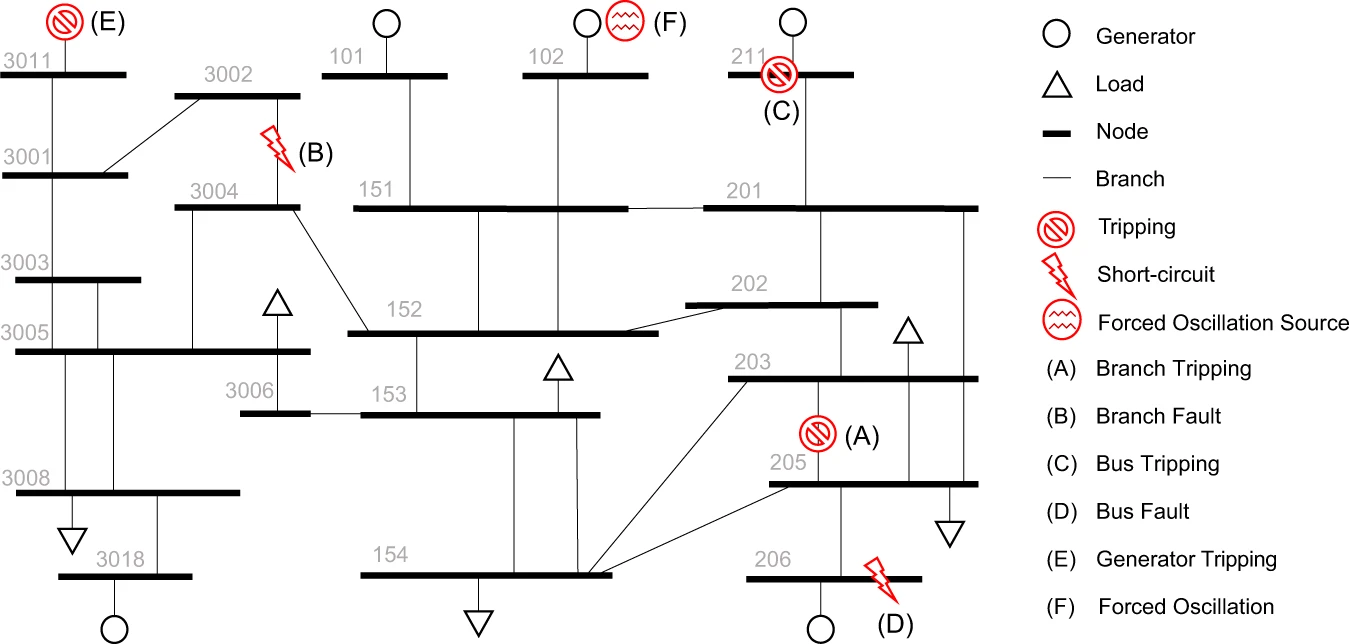

In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
h = 'time, Vm_101, Vm_102, Vm_151, Vm_152, Vm_153, Vm_154, Vm_201, Vm_202, Vm_203, Vm_204, Vm_205, Vm_206, Vm_211, Vm_3001, Vm_3002, Vm_3003, Vm_3004, Vm_3005, Vm_3006, Vm_3007, Vm_3008, Vm_3011, Vm_3018, Va_101, Va_102, Va_151, Va_152, Va_153, Va_154, Va_201, Va_202, Va_203, Va_204, Va_205, Va_206, Va_211, Va_3001, Va_3002, Va_3003, Va_3004, Va_3005, Va_3006, Va_3007, Va_3008, Va_3011, Va_3018, P_0_2_1 , P_1_2_1 , P_2_3_1 , P_2_3_2 , P_2_6_1 , P_3_4_1 , P_3_7_1 , P_3_16_1 , P_4_5_1 , P_4_5_2 , P_4_18_1 , P_5_8_1 , P_5_10_1 , P_5_20_1 , P_6_7_1 , P_6_9_1 , P_6_12_1 , P_7_8_1 , P_8_10_1 , P_8_10_2 , P_9_10_1 , P_10_11_1 , P_13_14_1 , P_13_15_1 , P_13_21_1 , P_14_16_1 , P_15_17_1 , P_15_17_2 , P_16_17_1 , P_17_18_1 , P_17_19_1 , P_17_20_1 , P_19_20_1 , P_20_22_1 , Q_0_2_1 , Q_1_2_1 , Q_2_3_1 , Q_2_3_2 , Q_2_6_1 , Q_3_4_1 , Q_3_7_1 , Q_3_16_1 , Q_4_5_1 , Q_4_5_2 , Q_4_18_1 , Q_5_8_1 , Q_5_10_1 , Q_5_20_1 , Q_6_7_1 , Q_6_9_1 , Q_6_12_1 , Q_7_8_1 , Q_8_10_1 , Q_8_10_2 , Q_9_10_1 , Q_10_11_1 , Q_13_14_1 , Q_13_15_1 , Q_13_21_1 , Q_14_16_1 , Q_15_17_1 , Q_15_17_2 , Q_16_17_1 , Q_17_18_1 , Q_17_19_1 , Q_17_20_1 , Q_19_20_1 , Q_20_22_1 ,'
h_n = 'Vm_101, Vm_102, Vm_151, Vm_152, Vm_153, Vm_154, Vm_201, Vm_202, Vm_203, Vm_204, Vm_205, Vm_206, Vm_211, Vm_3001, Vm_3002, Vm_3003, Vm_3004, Vm_3005, Vm_3006, Vm_3007, Vm_3008, Vm_3011, Vm_3018'
h_e = 'P_0_2_1 , P_1_2_1 , P_2_3_1 , P_2_3_2 , P_2_6_1 , P_3_4_1 , P_3_7_1 , P_3_16_1 , P_4_5_1 , P_4_5_2 , P_4_18_1 , P_5_8_1 , P_5_10_1 , P_5_20_1 , P_6_7_1 , P_6_9_1 , P_6_12_1 , P_7_8_1 , P_8_10_1 , P_8_10_2 , P_9_10_1 , P_10_11_1 , P_13_14_1 , P_13_15_1 , P_13_21_1 , P_14_16_1 , P_15_17_1 , P_15_17_2 , P_16_17_1 , P_17_18_1 , P_17_19_1 , P_17_20_1 , P_19_20_1 , P_20_22_1'

In [3]:
node_names = [ n.split('_')[1] for n in re.split('\s*,\s*', h_n)]
print('num of buses: ', len(node_names))
for i, nn in enumerate(node_names):
    print(i, nn)

num of buses:  23
0 101
1 102
2 151
3 152
4 153
5 154
6 201
7 202
8 203
9 204
10 205
11 206
12 211
13 3001
14 3002
15 3003
16 3004
17 3005
18 3006
19 3007
20 3008
21 3011
22 3018


Determin the coords of each bus using this diagram:

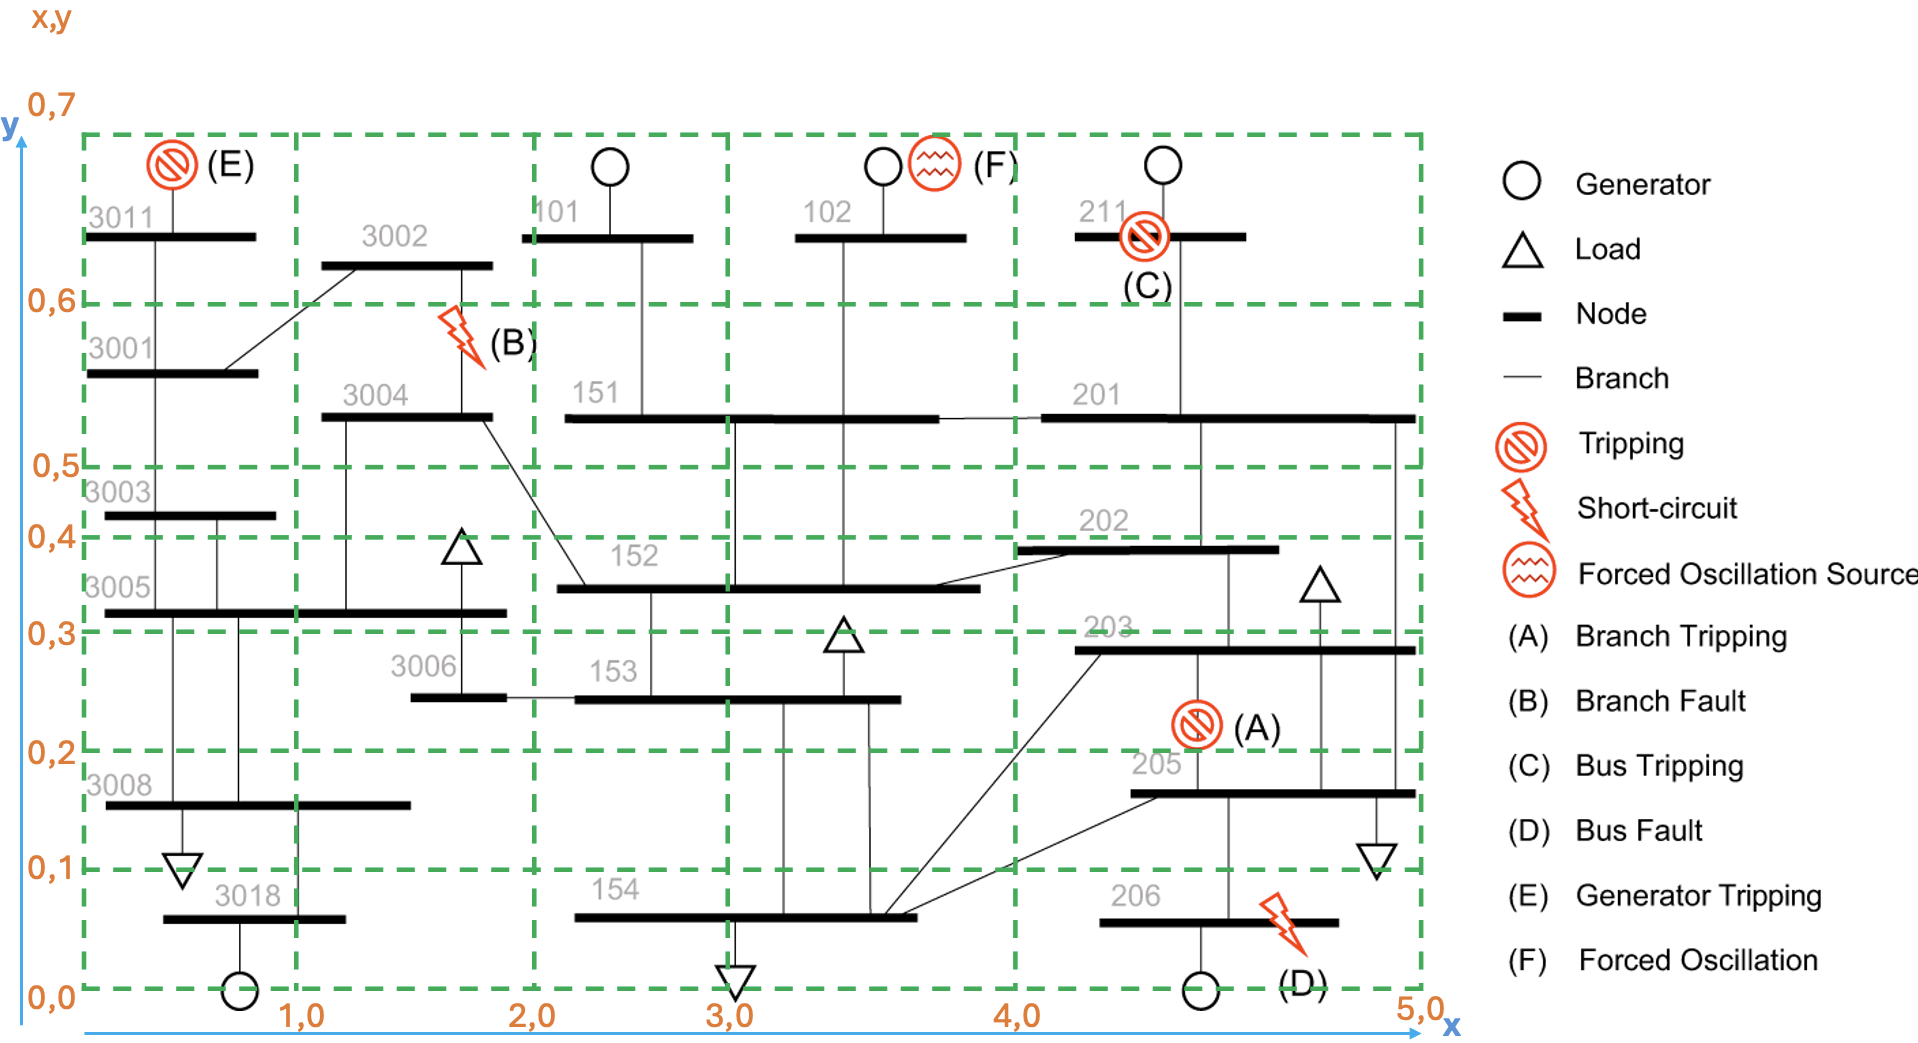

In [4]:
coords = [
    (2.5, 6.5), # 101
    (3.5, 6.5), # 102
    (3.0, 5.5), # 151
    (3.0, 3.5), # 152
    (3.0, 2.5), # 153
    (3.0, 0.5), # 154
    (4.5, 5.5), # 201
    (4.5, 3.5), # 202
    (4.5, 2.5), # 203
    (5.0, 2.0), # 204, not on diagram
    (4.5, 1.5), # 205
    (4.5, 0.5), # 206
    (4.5, 6.5), # 211
    (0.5, 5.5), # 3001
    (1.5, 6.5), # 3002
    (0.5, 4.5), # 3003
    (1.5, 5.5), # 3004
    (1.0, 3.5), # 3005
    (1.5, 2.5), # 3006
    (1.5, 2.0), # 3007, not on diagram
    (1.0, 1.5), # 3008
    (0.5, 6.5), # 3011
    (1.0, 0.5), # 3018
]

In [5]:
edge_tokens = re.split('\s*,\s*', h_e)
from_nodes = [ int(n.split('_')[1]) for n in edge_tokens]
to_nodes = [ int(n.split('_')[2]) for n in edge_tokens]
branch_names = [ int(n.split('_')[3]) for n in edge_tokens]

In [6]:
print('num of edges: ', len(from_nodes))
list(zip(from_nodes, to_nodes, branch_names))

num of edges:  34


[(0, 2, 1),
 (1, 2, 1),
 (2, 3, 1),
 (2, 3, 2),
 (2, 6, 1),
 (3, 4, 1),
 (3, 7, 1),
 (3, 16, 1),
 (4, 5, 1),
 (4, 5, 2),
 (4, 18, 1),
 (5, 8, 1),
 (5, 10, 1),
 (5, 20, 1),
 (6, 7, 1),
 (6, 9, 1),
 (6, 12, 1),
 (7, 8, 1),
 (8, 10, 1),
 (8, 10, 2),
 (9, 10, 1),
 (10, 11, 1),
 (13, 14, 1),
 (13, 15, 1),
 (13, 21, 1),
 (14, 16, 1),
 (15, 17, 1),
 (15, 17, 2),
 (16, 17, 1),
 (17, 18, 1),
 (17, 19, 1),
 (17, 20, 1),
 (19, 20, 1),
 (20, 22, 1)]

In [7]:
for nfrom, nto, branch in zip(from_nodes, to_nodes, branch_names):
    print(node_names[nfrom], '->', node_names[nto], 'b:', branch)

101 -> 151 b: 1
102 -> 151 b: 1
151 -> 152 b: 1
151 -> 152 b: 2
151 -> 201 b: 1
152 -> 153 b: 1
152 -> 202 b: 1
152 -> 3004 b: 1
153 -> 154 b: 1
153 -> 154 b: 2
153 -> 3006 b: 1
154 -> 203 b: 1
154 -> 205 b: 1
154 -> 3008 b: 1
201 -> 202 b: 1
201 -> 204 b: 1
201 -> 211 b: 1
202 -> 203 b: 1
203 -> 205 b: 1
203 -> 205 b: 2
204 -> 205 b: 1
205 -> 206 b: 1
3001 -> 3002 b: 1
3001 -> 3003 b: 1
3001 -> 3011 b: 1
3002 -> 3004 b: 1
3003 -> 3005 b: 1
3003 -> 3005 b: 2
3004 -> 3005 b: 1
3005 -> 3006 b: 1
3005 -> 3007 b: 1
3005 -> 3008 b: 1
3007 -> 3008 b: 1
3008 -> 3018 b: 1


In [8]:
list_edge_attrs = [ {'branch': branch} for branch in branch_names]

In [9]:

g = nx.MultiDiGraph()
g.add_edges_from(zip(from_nodes, to_nodes, list_edge_attrs))
adj = nx.adjacency_matrix(g)
print(adj.todense())


[[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 

In [10]:

# set node attributes: bus id and coordinates
for i, nn in enumerate(node_names):
    g.nodes[i]['bus'] = nn
    g.nodes[i]['pos'] = coords[i]

In [20]:
def draw_graph(g, print_bus_label=True):
    positions = {n: attr['pos'] for n, attr in g.nodes(data=True)}
    
    node_size = 800
    node_shape = 's'

    nx.draw_networkx_nodes(g, positions, 
                            node_size=node_size,
                            node_color='white', 
                            node_shape=node_shape, # reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html#filled-markers
                            alpha=0.8,
                            linewidths=2,
                            edgecolors='k'
                           )

    if print_bus_label:
        node_labels = {n: attr['bus'] for n, attr in g.nodes(data=True)}
        nx.draw_networkx_labels(g, positions, labels = node_labels,
                                font_size = 10,
                                font_color='r'
                                )
    nx.draw_networkx_edges(g, positions, 
                           edge_color='b', 
                           arrows=True, 
                           arrowsize=20, 
                           connectionstyle='arc3,rad=0.1',
                           node_size=node_size,
                           node_shape=node_shape
                           )

    edge_labels = {(u, v): attr['branch'] for u, v, attr in g.edges(data=True)}
    nx.draw_networkx_edge_labels(g, positions, edge_labels=edge_labels,
                                font_size = 10,
                                font_color='b'
                                ) 

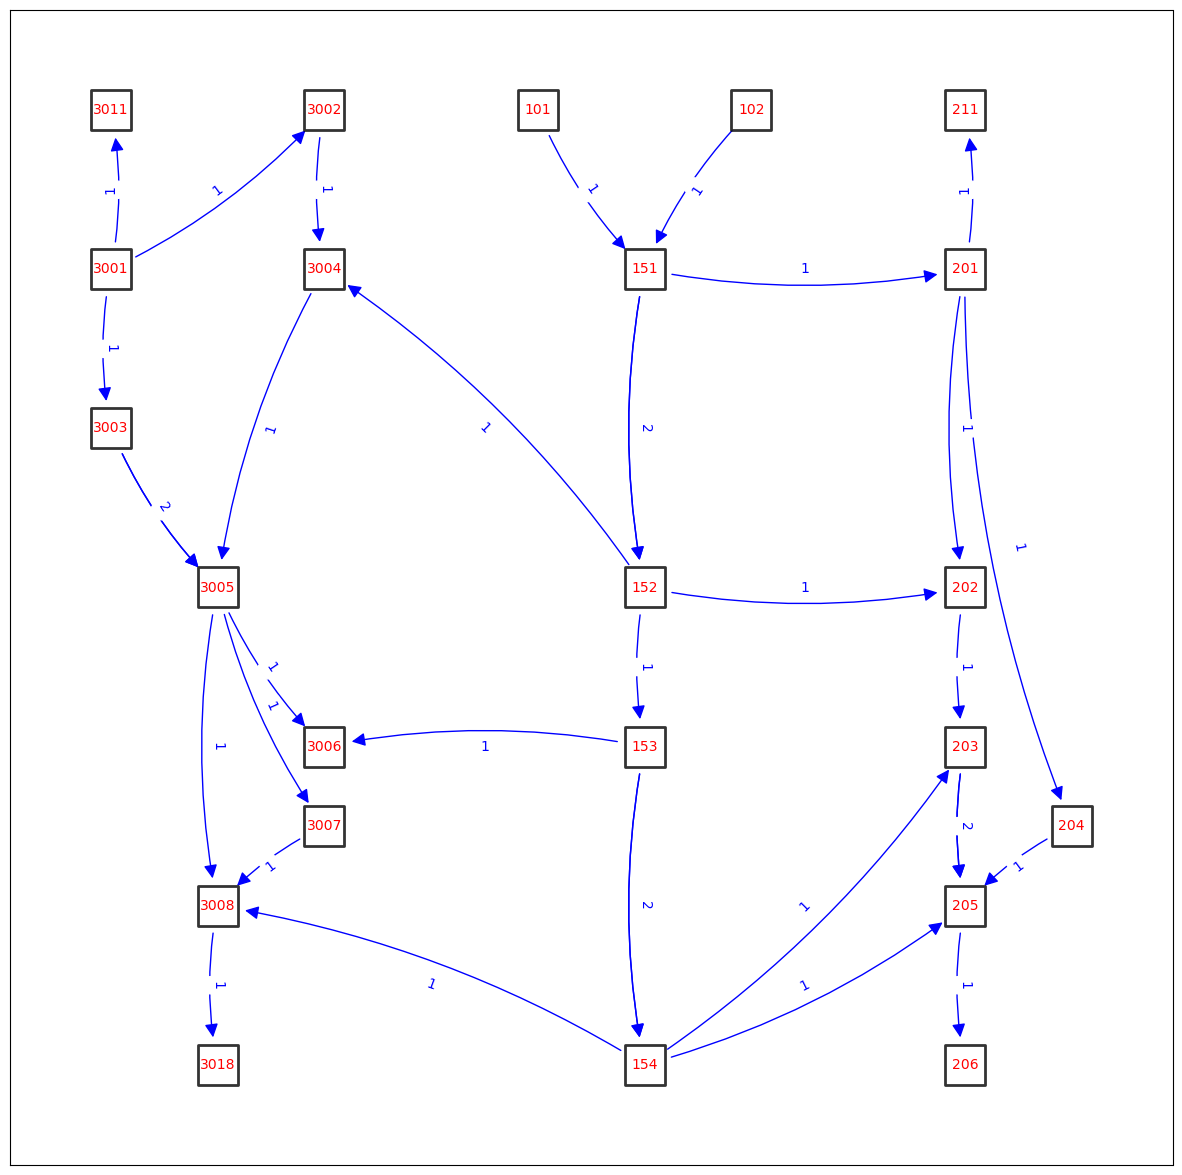

In [21]:
plt.figure(figsize=(15,15))
draw_graph(g)

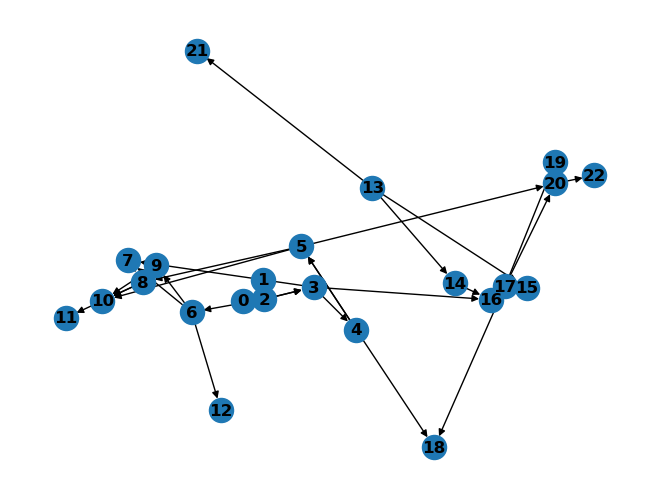

In [24]:
nx.draw(g, with_labels=True, font_weight='bold')

In [28]:
g.nodes(data=True)

NodeDataView({0: {'bus': '101', 'pos': (2.5, 6.5)}, 2: {'bus': '151', 'pos': (3.0, 5.5)}, 1: {'bus': '102', 'pos': (3.5, 6.5)}, 3: {'bus': '152', 'pos': (3.0, 3.5)}, 6: {'bus': '201', 'pos': (4.5, 5.5)}, 4: {'bus': '153', 'pos': (3.0, 2.5)}, 7: {'bus': '202', 'pos': (4.5, 3.5)}, 16: {'bus': '3004', 'pos': (1.5, 5.5)}, 5: {'bus': '154', 'pos': (3.0, 0.5)}, 18: {'bus': '3006', 'pos': (1.5, 2.5)}, 8: {'bus': '203', 'pos': (4.5, 2.5)}, 10: {'bus': '205', 'pos': (4.5, 1.5)}, 20: {'bus': '3008', 'pos': (1.0, 1.5)}, 9: {'bus': '204', 'pos': (4.5, 2.0)}, 12: {'bus': '211', 'pos': (4.5, 6.5)}, 11: {'bus': '206', 'pos': (4.5, 0.5)}, 13: {'bus': '3001', 'pos': (0.5, 5.5)}, 14: {'bus': '3002', 'pos': (1.5, 6.5)}, 15: {'bus': '3003', 'pos': (0.5, 4.5)}, 21: {'bus': '3011', 'pos': (0.5, 6.5)}, 17: {'bus': '3005', 'pos': (1.0, 3.5)}, 19: {'bus': '3007', 'pos': (1.5, 2.0)}, 22: {'bus': '3018', 'pos': (1.0, 0.5)}})

In [37]:
g.edges(data=True)

OutMultiEdgeDataView([(0, 2, {'branch': 1}), (2, 3, {'branch': 1}), (2, 3, {'branch': 2}), (2, 6, {'branch': 1}), (1, 2, {'branch': 1}), (3, 4, {'branch': 1}), (3, 7, {'branch': 1}), (3, 16, {'branch': 1}), (6, 7, {'branch': 1}), (6, 9, {'branch': 1}), (6, 12, {'branch': 1}), (4, 5, {'branch': 1}), (4, 5, {'branch': 2}), (4, 18, {'branch': 1}), (7, 8, {'branch': 1}), (16, 17, {'branch': 1}), (5, 8, {'branch': 1}), (5, 10, {'branch': 1}), (5, 20, {'branch': 1}), (8, 10, {'branch': 1}), (8, 10, {'branch': 2}), (10, 11, {'branch': 1}), (20, 22, {'branch': 1}), (9, 10, {'branch': 1}), (13, 14, {'branch': 1}), (13, 15, {'branch': 1}), (13, 21, {'branch': 1}), (14, 16, {'branch': 1}), (15, 17, {'branch': 1}), (15, 17, {'branch': 2}), (17, 18, {'branch': 1}), (17, 19, {'branch': 1}), (17, 20, {'branch': 1}), (19, 20, {'branch': 1})])